In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns

import importlib
import sys
import os


scripts_dir = os.path.abspath('../scripts')
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)

# Importar el archivo viztools.py
import viztools as v

df = pd.read_csv("../data/Superstore_2023.csv")


In [16]:
importlib.reload(v)

<module 'viztools' from '/Users/jaimeinchaurraga/Documents/GitHub/03_EDA_Superstore/scripts/viztools.py'>

In [ ]:
# Primer vistazo general al dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                9994 non-null   object 
 1   City                    9994 non-null   object 
 2   Country/Region          9994 non-null   object 
 3   Customer ID             9994 non-null   object 
 4   Customer Name           9994 non-null   object 
 5   Order Date              9994 non-null   object 
 6   Order ID                9994 non-null   object 
 7   Order Profitable?       9994 non-null   object 
 8   Postal Code             9983 non-null   float64
 9   Product ID              9994 non-null   object 
 10  Product Name            9994 non-null   object 
 11  Region                  9994 non-null   object 
 12  Row ID                  9994 non-null   int64  
 13  Segment                 9994 non-null   object 
 14  Ship Date               9994 non-null   

In [3]:
pd.set_option('display.max_columns', None)
df.head(2)

,Category,City,Country/Region,Customer ID,Customer Name,Order Date,Order ID,Order Profitable?,Postal Code,Product ID,Product Name,Region,Row ID,Segment,Ship Date,Ship Mode,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
0,Furniture,Henderson,United States,CG-12520,Claire Gute,8/11/2021,CA-2021-152156,Profitable,42420.0,FUR-BO-10001798,Bush Somerset Collection Bookcase,South,1,Consumer,11/11/2021,Second Class,Shipped On Time,Kentucky,Bookcases,3,3,0.00%,42,2,262,392
1,Furniture,Henderson,United States,CG-12520,Claire Gute,8/11/2021,CA-2021-152156,Profitable,42420.0,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South,2,Consumer,11/11/2021,Second Class,Shipped On Time,Kentucky,Chairs,3,3,0.00%,220,3,732,1096


In [9]:
# a través de esta función se puede realizar un primer análisis de las columnas, con el objetivo de hacer un primer limpiado 
v.analyze_dataset(df)

,Column,Unique Values,Null Values,Variable Type,Cardinality
0,Category,3,0,Categorical,0.03%
1,City,531,0,Categorical High Cardinality,5.31%
2,Country/Region,1,0,Categorical,0.01%
3,Customer ID,793,0,Categorical High Cardinality,7.93%
4,Customer Name,793,0,Categorical High Cardinality,7.93%
5,Order Date,1236,0,Categorical High Cardinality,12.37%
6,Order ID,5009,0,Categorical High Cardinality,50.12%
7,Order Profitable?,2,0,Categorical,0.02%
8,Postal Code,630,11,Numerical Continuous,6.30%
9,Product ID,1862,0,Categorical High Cardinality,18.63%


| **Nombre**              | **Descripción**                                      | **Tipo de Variable**   | **Importancia Inicial** | **Notas**                                                                 |
|-------------------------|-----------------------------------------------------|------------------------|-------------------------|---------------------------------------------------------------------------|
| Category                | Categoría del producto                               | Categórica             | Alta                    | Identifica el tipo de producto.                                           |
| City                    | Ciudad donde se realizó el pedido                    | Categórica             | Media                   | Puede influir en patrones de compra.                                      |
| Country/Region          | País o región donde se realizó el pedido             | Categórica             | Alta                    | Segmentación por ubicación.                                               |
| Customer ID             | Identificador único del cliente                      | Categórica             | Muy baja                | No es útil para el análisis.                                              |
| Customer Name           | Nombre del cliente                                   | Categórica             | Muy baja                | No es útil para el análisis.                                              |
| Order Date              | Fecha del pedido                                     | Categórica             | Alta                    | Crucial para análisis de tiempo.                                          |
| Order ID                | Identificador único del pedido                       | Categórica             | Muy baja                | No es útil para el análisis.                                              |
| Order Profitable?       | Indica si el pedido fue rentable                     | Categórica             | Alta                    | Indicador de rentabilidad.                                                |
| Postal Code             | Código postal del cliente                            | Numérica (Decimal)      | Muy baja                | No es útil para el análisis.                                              |
| Product ID              | Identificador único del producto                     | Categórica             | Muy baja                | No es útil para el análisis.                                              |
| Product Name            | Nombre del producto                                  | Categórica             | Media                   | Útil para análisis de producto.                                           |
| Region                  | Región donde se realizó el pedido                    | Categórica             | Alta                    | Segmentación geográfica.                                                  |
| Row ID                  | Identificador único de la fila                       | Numérica (Entera)       | Muy baja                | No es útil para el análisis.                                              |
| Segment                 | Segmento de cliente                                  | Categórica             | Alta                    | Permite la segmentación de clientes.                                      |
| Ship Date               | Fecha de envío del pedido                            | Categórica             | Media                   | Relacionada con la logística.                                             |
| Ship Mode               | Modo de envío utilizado                              | Categórica             | Media                   | Puede afectar la satisfacción del cliente.                                |
| Ship Status             | Estado del envío                                     | Categórica             | Media                   | Indicador de cumplimiento de plazos.                                      |
| State                   | Estado donde se realizó el pedido                    | Categórica             | Media                   | Útil para análisis locales.                                               |
| Sub-Category            | Subcategoría del producto                            | Categórica             | Media                   | Detalle adicional de la categoría.                                        |
| Days to Ship Actual     | Días reales para el envío                            | Numérica (Entera)       | Alta                    | Indicador de eficiencia logística.                                        |
| Days to Ship Scheduled  | Días programados para el envío                       | Numérica (Entera)       | Alta                    | Comparación con el tiempo real de envío.                                  |
| Discount                | Descuento aplicado al producto                       | Numérica             | Media                   | Afecta el margen de ganancia.                                             |
| Profit                  | Ganancia obtenida del pedido                        | Numérica (Entera)       | Alta                    | Indicador de rentabilidad.                                                |
| Quantity                | Cantidad de productos en el pedido                  | Numérica (Entera)       | Media                   | Afecta el total de ventas.                                                |
| Sales                   | Ventas totales del pedido                           | Numérica (Entera)       | Alta                    | Indicador clave de rendimiento.                                           |
| Sales Forecast          | Pronóstico de ventas                                | Numérica (Entera)       | Media                   | Puede usarse para validar el pronóstico.                                  |


In [ ]:
# Se procede a eliminar todas las columnas que no son útiles porque presentan una alta cardinalidad o por que la información 
# que muestran no es relevante para el objeto de estudio.
# La única variable que tiene nulos es eliminada al no ser relevante
# Se cambia el dtype de las variables temporales para poder trabajar correctamente con ellas.

In [3]:
# Eliminar columnas
df = df.drop(['Customer ID','Order ID','Postal Code','Product ID','Row ID'], axis = 1)

# Convertir las columnas de fecha con el formato correcto
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y", errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%d/%m/%Y", errors='coerce')

# Eliminar el símbolo '%' y convertir a float
df['Discount'] = df['Discount'].str.rstrip('%')  # Asegúrate de usar el nombre correcto de la columna
df['Discount'] = df['Discount'].astype(float) / 100

df['Days to Ship Scheduled'] = df['Days to Ship Scheduled'].astype(int) 



In [4]:
# Agrupar las variables categóricas y númericas para poder trabajar mejor 
categorical_columns = [
    'Category', 'City', 'Country/Region', 'Customer Name', 'Order Date',
    'Order Profitable?', 'Product Name', 'Region', 'Segment', 'Ship Date',
    'Ship Mode', 'Ship Status', 'State', 'Sub-Category'
]

numerical_columns = [
    'Days to Ship Actual', 'Days to Ship Scheduled', 'Discount', 'Profit',
    'Quantity', 'Sales', 'Sales Forecast'
]

# Análisis Univariante de Variables Numéricas

## Preguntas de Negocio

### 1. **Ventas (Sales)**
- ¿Cuál es la distribución de las ventas? (media, mediana, desviación estándar, mínimos y máximos)
- ¿Cuáles son los valores atípicos (outliers) en las ventas y cómo afectan a la media?
- ¿Cómo se distribuyen las ventas en los distintos segmentos (por ejemplo, por región, categoría)?

### 2. **Cantidad (Quantity)**
- ¿Cuál es la cantidad promedio de productos vendidos por pedido?
- ¿Existen pedidos con cantidades extremadamente altas o bajas? ¿Cómo afectan estos a la distribución general?
- ¿Cuál es la moda (el valor que más se repite) en la cantidad de productos por pedido?

### 3. **Descuento (Discount)**
- ¿Cuál es el promedio y la variabilidad de los descuentos aplicados?
- ¿Hay una concentración de descuentos en ciertos rangos específicos (por ejemplo, 0%, 10%, 20%)?
- ¿Qué porcentaje de los pedidos no tienen descuento aplicado?

### 4. **Ganancia (Profit)**
- ¿Cuál es la distribución de las ganancias? ¿Existen pérdidas significativas?
- ¿Cuáles son los valores atípicos en las ganancias y cómo afectan a la media?
- ¿Cómo se distribuyen las ganancias por categoría de producto?

### 5. **Días para Envío Actual (Days to Ship Actual)**
- ¿Cuál es el tiempo promedio de envío y su variabilidad?
- ¿Hay pedidos que tardan significativamente más o menos tiempo en enviarse?
- ¿Cómo varía el tiempo de envío entre diferentes modos de envío (por ejemplo, Clase Estándar, Clase Rápida)?

### 6. **Días para Envío Programado (Days to Ship Scheduled)**
- ¿Cuál es el tiempo promedio programado para el envío y su variabilidad?
- ¿Existen diferencias significativas entre el tiempo programado y el tiempo real de envío?

### 7. **Pronóstico de Ventas (Sales Forecast)**
- ¿Qué tan precisos son los pronósticos de ventas comparados con las ventas reales?
- ¿Existen desviaciones significativas entre el pronóstico y las ventas reales?
- ¿Cuál es la variabilidad de los pronósticos de ventas y cómo afecta la planificación de inventarios?

### 8. **Correlaciones y Relación entre Variables**
- ¿Qué relación existe entre la cantidad de productos vendidos y las ganancias obtenidas?
- ¿Cómo se relaciona el descuento aplicado con las ventas y las ganancias?
- ¿Hay correlaciones significativas entre el tiempo de envío y la satisfacción del cliente (medido por las ganancias o devoluciones)?



### 1. **'Sales' y 'Profit'**
- ¿Cuál es la distribución de las ventas? (media, mediana, desviación estándar, mínimos y máximos)? ¿Y del beneficio?  
- ¿Cuáles son los valores atípicos (outliers)  y cómo afectan a la media y al resto de datos? 

Primero se analizará 'Sales' y 'Profit' ya que se pueden considerar las variables más importantes

In [13]:
df[numerical_columns].describe()

,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,3.958475,4.320692,0.156203,28.651891,3.789574,229.873324,344.244847
std,1.747603,2.176059,0.206452,234.255712,2.225110,623.248946,933.364519
min,0.000000,0.000000,0.000000,-6600.000000,1.000000,0.000000,1.000000
25%,3.000000,3.000000,0.000000,2.000000,2.000000,17.000000,26.000000
50%,4.000000,6.000000,0.200000,9.000000,3.000000,54.500000,82.000000
75%,5.000000,6.000000,0.200000,29.000000,5.000000,210.000000,314.000000
max,7.000000,6.000000,0.800000,8400.000000,14.000000,22638.000000,33903.000000


In [14]:
# esta función analiza la dispersión. Devuelve una serie y en la primera muestra los resultados incluyendo los outliers y en la segunda sin
# ya que los valores muy extremos pueden generar una imagen falsa de la verdadera dispersión
v.variabilidad(df, columns=['Sales','Profit'])

(              mean         std        CV  High Dispersion
 Sales   229.873324  623.248946  2.711271             True
 Profit   28.651891  234.255712  8.175925             True,
              mean        std        CV  High Dispersion
 Sales   70.323432  89.935285  1.278881             True
 Profit  11.034676  17.577125  1.592899             True)

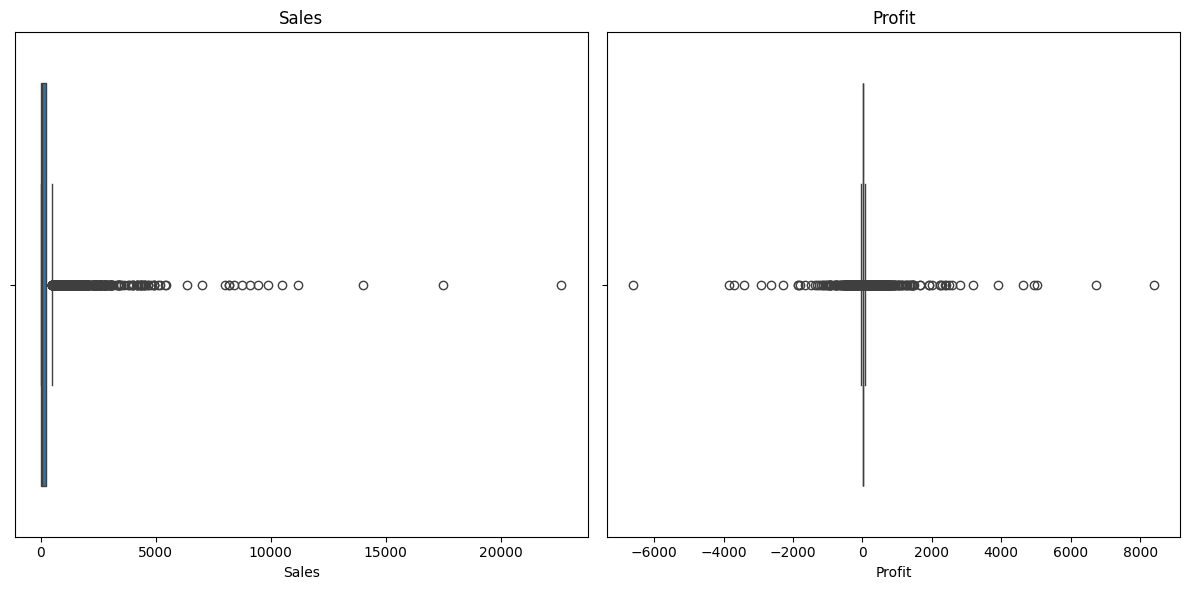

In [7]:
v.plot_multiple_boxplots(df, ["Sales","Profit"])

In [27]:
# Doble check con value counts ordenado por los valores más altos para comprobar los valores extremos (coinciden con los boxplots)
value_counts = df["Sales"].value_counts().sort_index(ascending=False)

value_counts

Sales
22638      1
17500      1
14000      1
11200      1
10500      1
        ... 
4        141
3        160
2         88
1         35
0          1
Name: count, Length: 1148, dtype: int64

 Boxplots  
 
 - Sales:  
   - Distribución de larga cola a la derecha, indicando que el 50% de los productos que se venden se encuentran con un precio de venta bajo, cercanos al cero  
   - Un número considerable de outliers a dos niveles. La primera agrupación que es más grande, se encuentra muy cerca del bigote derecho. La segunda agrupación  
   es mucho menor y más distribuída, indicando que a cuanto mayor es el precio se producen menos ventas se producen.


 - Profit:  
   - Distribución de forma de cruz. En este caso también se observa que el 50% de los productos dan un beneficio relativamente bajo con valores cercanos al cero.  
   - Se aprecia que existen un número alto de outlers en ambas direcciones:  
      - Los outliers del lado izquierdo muestran que existe un número considerable de ventas que no han sido rentables. La agrupación más grande se encuentra en valores  
      cercanos al cero. Existen por tanto pocas ventas que hayan tenido un profit muy negativo.  
      - Los outliers del lado derecho tienen una estrcutura muy parecida al lado izquierdo: una agrupación considerable de ventas que obtienen un beneficio cercano al cero  
      y pocas ventas que hayan tenido un beneficio extremadamente alto.



- En líneas generales ambas variables tienen cajas muy estrechas. El gran número de valores extremos hace que no se pueda ver bien el detalle de los rangos donde se concetran la mayoría de los valores.  
Por ello, a continuación se harán uso de histogramas y gráficos de densidad segmentados para ver en detalle las agrupaciones y tratar de obtener información valiosa.

 

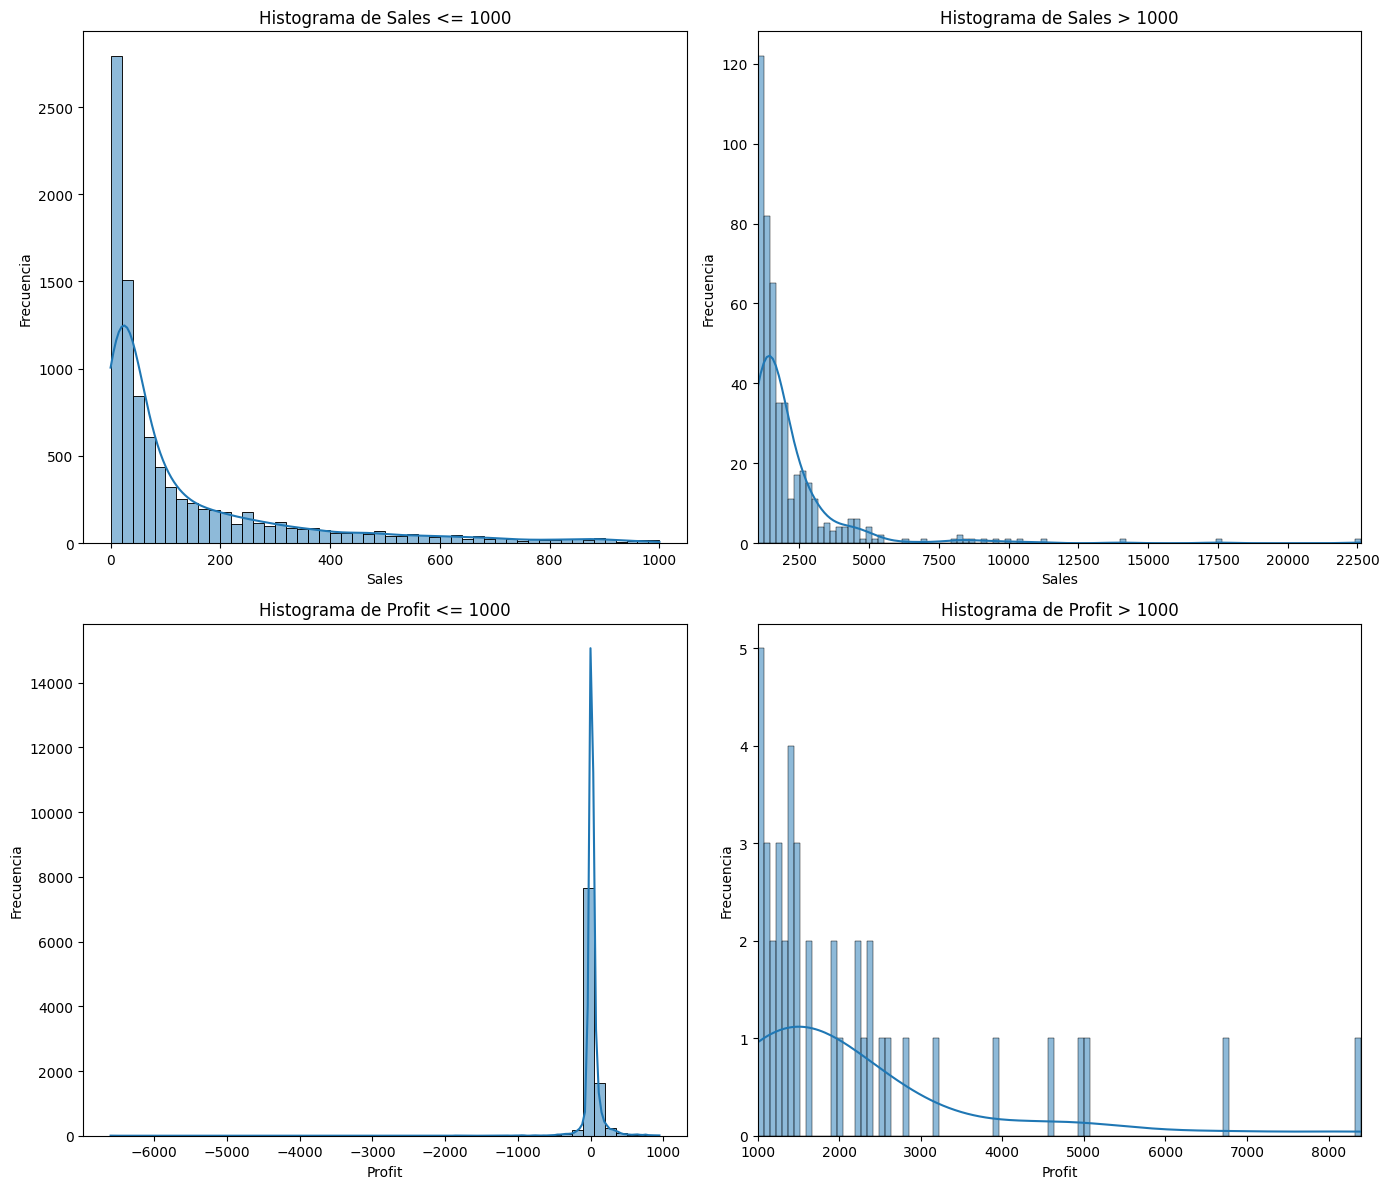

In [13]:
v.plot_histograms_huge_data(df, ["Sales","Profit"], limit=1000)

 Histogramas y gráficas de densidad 
 
Estas gráficas confirman las conclusiones obtenidas en los boxplots en cuanto a dipersión y distribución de los datos en 'Sales' y 'Profit'.  
- La mayor parte de los ingresos se producen con la venta de productos de relativo bajo coste, en rangos cercanos al cero, aunqwue también hay un  
número considerable de ventas en otros espectros. En este caso, la gráfica permite visualizar con mayor granularidad dicha composición.  

- Cuando se realice el análsis bivariante será interesante entender cómo afectan otras variables a las ventas.  
 
- El profit también se confirma que tiene una distribución muy condensada en valores cercanos al cero, algo que tiene lógica tras ver las ventas.  
Pero en este caso la distrbución de los outliers no sólo se produce en valores positivos sino negativos. Este punto desde la perspectiva de negocio,    
seguramente sea el más importante a tratar. En el análisis bivariante se tendrá que encontrar algún tipo de patrón que ayude a enteder características   
propias de estos valores negativos, para posteriormente buscar una solución.

### 2. **'Quantity' y 'Discount'**

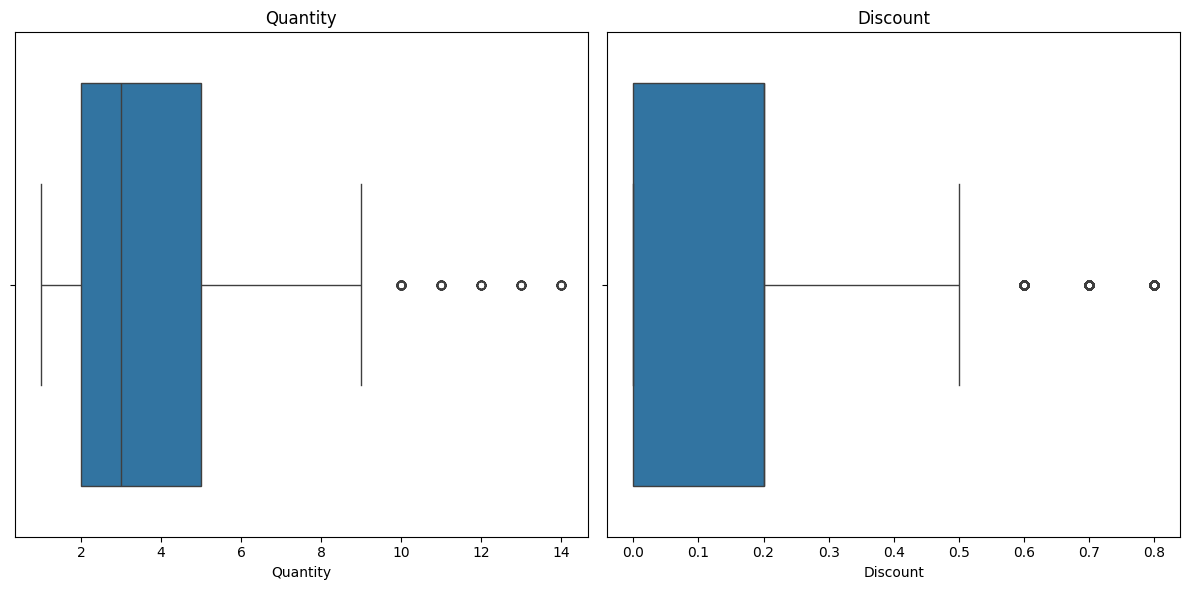

In [23]:
v.plot_multiple_boxplots(df, ['Quantity','Discount'])

In [ ]:
# check rápido de que los outliers son correctos
max_quantity = df['Quantity'].max()
max_discount = df['Discount'].max()
print(max_quantity)
print(max_discount)

14
0.8


In [32]:
median = df["Quantity"].median()
print(median)

3.0


<Axes: >

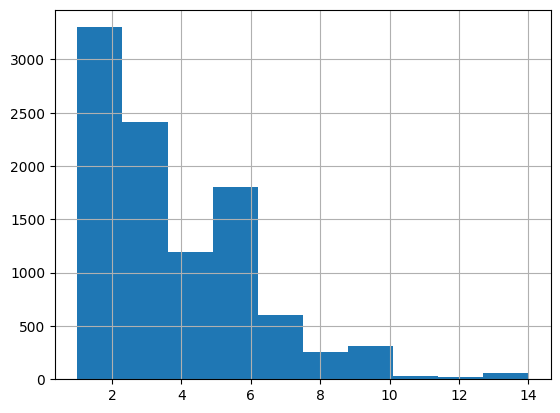

In [33]:
df["Quantity"].hist()

 Boxplots  
 
 - Quantity:  
   - Distribución muy regular; los datos no se encuentran dispersos sino que se concentran en un rango pequeño de cantidad de productos.   
   - Existe una serie de outliers pasado el bigote derecho, pero se tratan de un número residual, que apenas afecta a la distribución general de los datos.  


 - Discount:  
   - Distribución muy similar a `Quantity`, bastante regular, aunque en este caso la mayoría de los datos se agrupan al bigote izquierdo, indicando que la mayor parte de los descuentos son de un porcentaje muy bajo cercanos al cero.  
   - En este caso también existen outliers cercanos al bigote derecho, también se trata de un número muy reducido de estos (* Reducido en cuanto a la variedad de los mismos, posteriormente se realizará un value_counts para entender el detalle de estos números )


In [28]:
value_counts_q = df["Quantity"].value_counts().sort_index(ascending=False)

value_counts_q

Quantity
14      29
13      27
12      23
11      34
10      57
9      258
8      257
7      606
6      572
5     1230
4     1191
3     2409
2     2402
1      899
Name: count, dtype: int64

In [29]:
value_counts_d = df["Discount"].value_counts().sort_index(ascending=False)

value_counts_d

Discount
0.80     300
0.70     418
0.60     138
0.50      66
0.45      11
0.40     206
0.32      27
0.30     227
0.20    3657
0.15      52
0.10      94
0.00    4798
Name: count, dtype: int64

In [22]:

df[['Quantity','Discount']].describe()

,Quantity,Discount
count,9994.000000,9994.000000
mean,3.789574,0.156203
std,2.225110,0.206452
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.200000
75%,5.000000,0.200000
max,14.000000,0.800000


### 3. **'Days to Ship Actual' y 'Days to Ship Scheduled'**

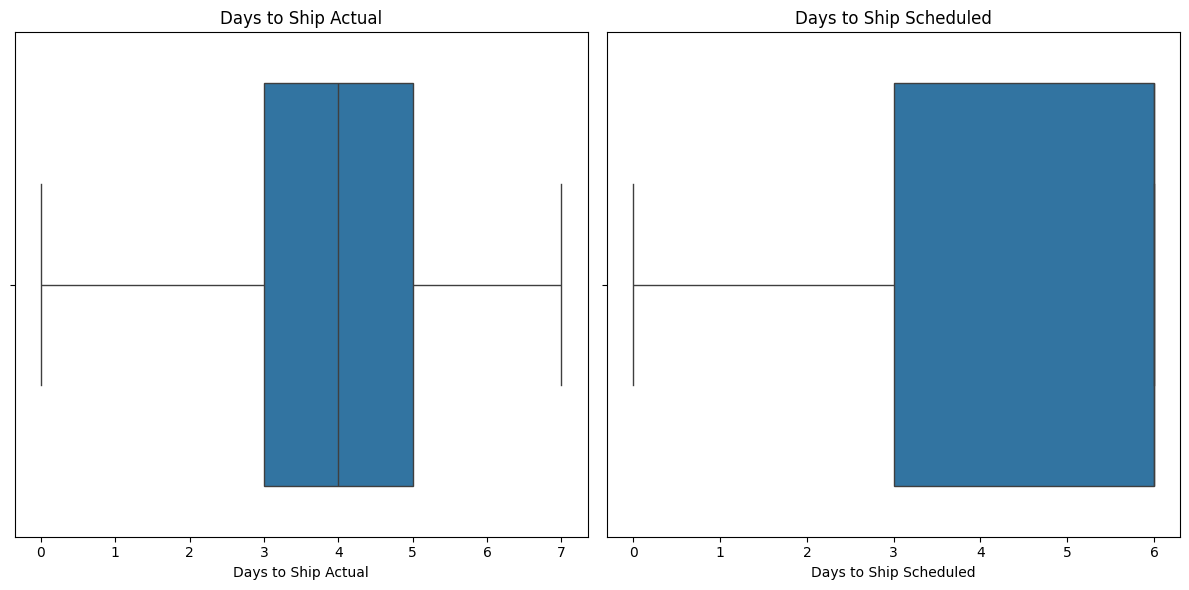

In [27]:
v.plot_multiple_boxplots(df, ['Days to Ship Actual', 'Days to Ship Scheduled'])

 Boxplots  
 
 - Days to Ship Actual: (Días reales de envío) 
   - Distribución muy regular; los datos no se encuentran dispersos sino que se concentran en un rango pequeño de días. El rango intercuartílico se sitúa entre 3 y 5 días,  
   indicando que el 50% de los datos se encuentran situados en ese estrecho rango.  
    Por otro lado, el resto de productos son entregados en un rango algo más amplio, que se pueden observar a través de los bigotes.     
   - En este caso, no existen outliers: el rango real que abarca todas las posibilidades en cuantó a días reales para la entrega de un producto, va de 0 (*habría que comprobar si es un error o qué  
   significado tiene) a 7 días.  
   Sin duda un dato curioso que de casi 10K envíos a lo largo de todo EEUU, nunca se haya demorado más de 7 días ni un sólo envío.    


 - Days to Ship Scheduled:  (Días programados de envío)
   - Distribución muy similar a `Days to Ship Actual`, bastante regular, aunque con alguna diferencia. El IQR se posiciona entre 3 y 6 días, por lo que la estrategia lógistica de la compañía se propone un  
   rango muy específico para el envío de sus productos.El otro 50% de los envíos son programados en un rango incluso más reducido, fijado en el bigote izquierdo (de 0 a 3 días)  
   - Tampoco de visualizan datos extremos que se encuentren fuera de los bigotes.  


- Como comentario a tener en cuenta, resalta el rango tan estrecho tanto de programación como de duración real a la hora de realizar tantos envíos de productos. Resulta ciertamente curioso que no se encuentre  
registrado ningún caso de problemas de envíos (extraviados, paquetes equivocados, etc) Sería útil realizar un doble check con el departamento de logística para que confirme que estas cifras son reales.  
Posteriormente, cuando se realice el análsis bivariante, se utilizará alguna herramienta para visualizar la co-relación entre estas variantes, incluso incluyendo alguna otra que pueda resultar interesante.  
Por ejemplo, decubrir en qué zonas o con qué productos los envíos son más rápidos/lentos y en qué casos existen mas diferencias entre la programación y el resultado real.

In [19]:
df[['Days to Ship Actual', 'Days to Ship Scheduled']].describe()

,Days to Ship Actual,Days to Ship Scheduled
count,9994.000000,9994.000000
mean,3.958475,4.320692
std,1.747603,2.176059
min,0.000000,0.000000
25%,3.000000,3.000000
50%,4.000000,6.000000
75%,5.000000,6.000000
max,7.000000,6.000000


In [21]:
v.variabilidad(df, columns=['Days to Ship Actual', 'Days to Ship Scheduled'], high_dispersion_threshold=0.8)

(                            mean       std        CV  High Dispersion
 Days to Ship Actual     3.958475  1.747603  0.441484            False
 Days to Ship Scheduled  4.320692  2.176059  0.503637            False,
                             mean       std        CV  High Dispersion
 Days to Ship Actual     3.958475  1.747603  0.441484            False
 Days to Ship Scheduled  4.320692  2.176059  0.503637            False)

# Análisis Univariante de Variables Categóricas

In [ ]:
# Categóricas agrupadas
categorical_columns = [
    'Category', 'City', 'Country/Region', 'Customer Name', 'Order Date',
    'Order Profitable?', 'Product Name', 'Region', 'Segment', 'Ship Date',
    'Ship Mode', 'Ship Status', 'State', 'Sub-Category'
]

In [42]:
# Creo una nueva variable donde se incluyan las columnas más importantes para el análisis univariante.
# Además ciertas columnas debido a su composición y alto número de valores pueden no resultar atractivas para el análisis. Tal vez se eliminen posteriormente.
critical_categorical_columns = [
    'Category','Sub-Category', 'Segment','Order Profitable?', 'Ship Mode', 'Ship Status', 'State'
]

| Variable          | Motivo de exclusión                               | Notas                                           |
|:------------------|:--------------------------------------------------|:------------------------------------------------|
| City              | Demasiados valores para una gráfica única         | Considerar un análisis univariante por separado |
| Country/Region    | Solo un país (EEUU), no es útil                   |                                                 |
| Customer Name     | Demasiados valores, no parece valioso univariante |                                                 |
| Order Date        | No aporta en análisis univariante                 | Se utilizará en análisis multivariante          |
| Product Name      | Demasiados valores para una gráfica única         | No parece útil de forma univariante             |
| Region            | Demasiados valores para una gráfica única         | Considerar un análisis univariante por separado |
| Ship Date         | No aporta en análisis univariante                 | Se utilizará en análisis multivariante          |



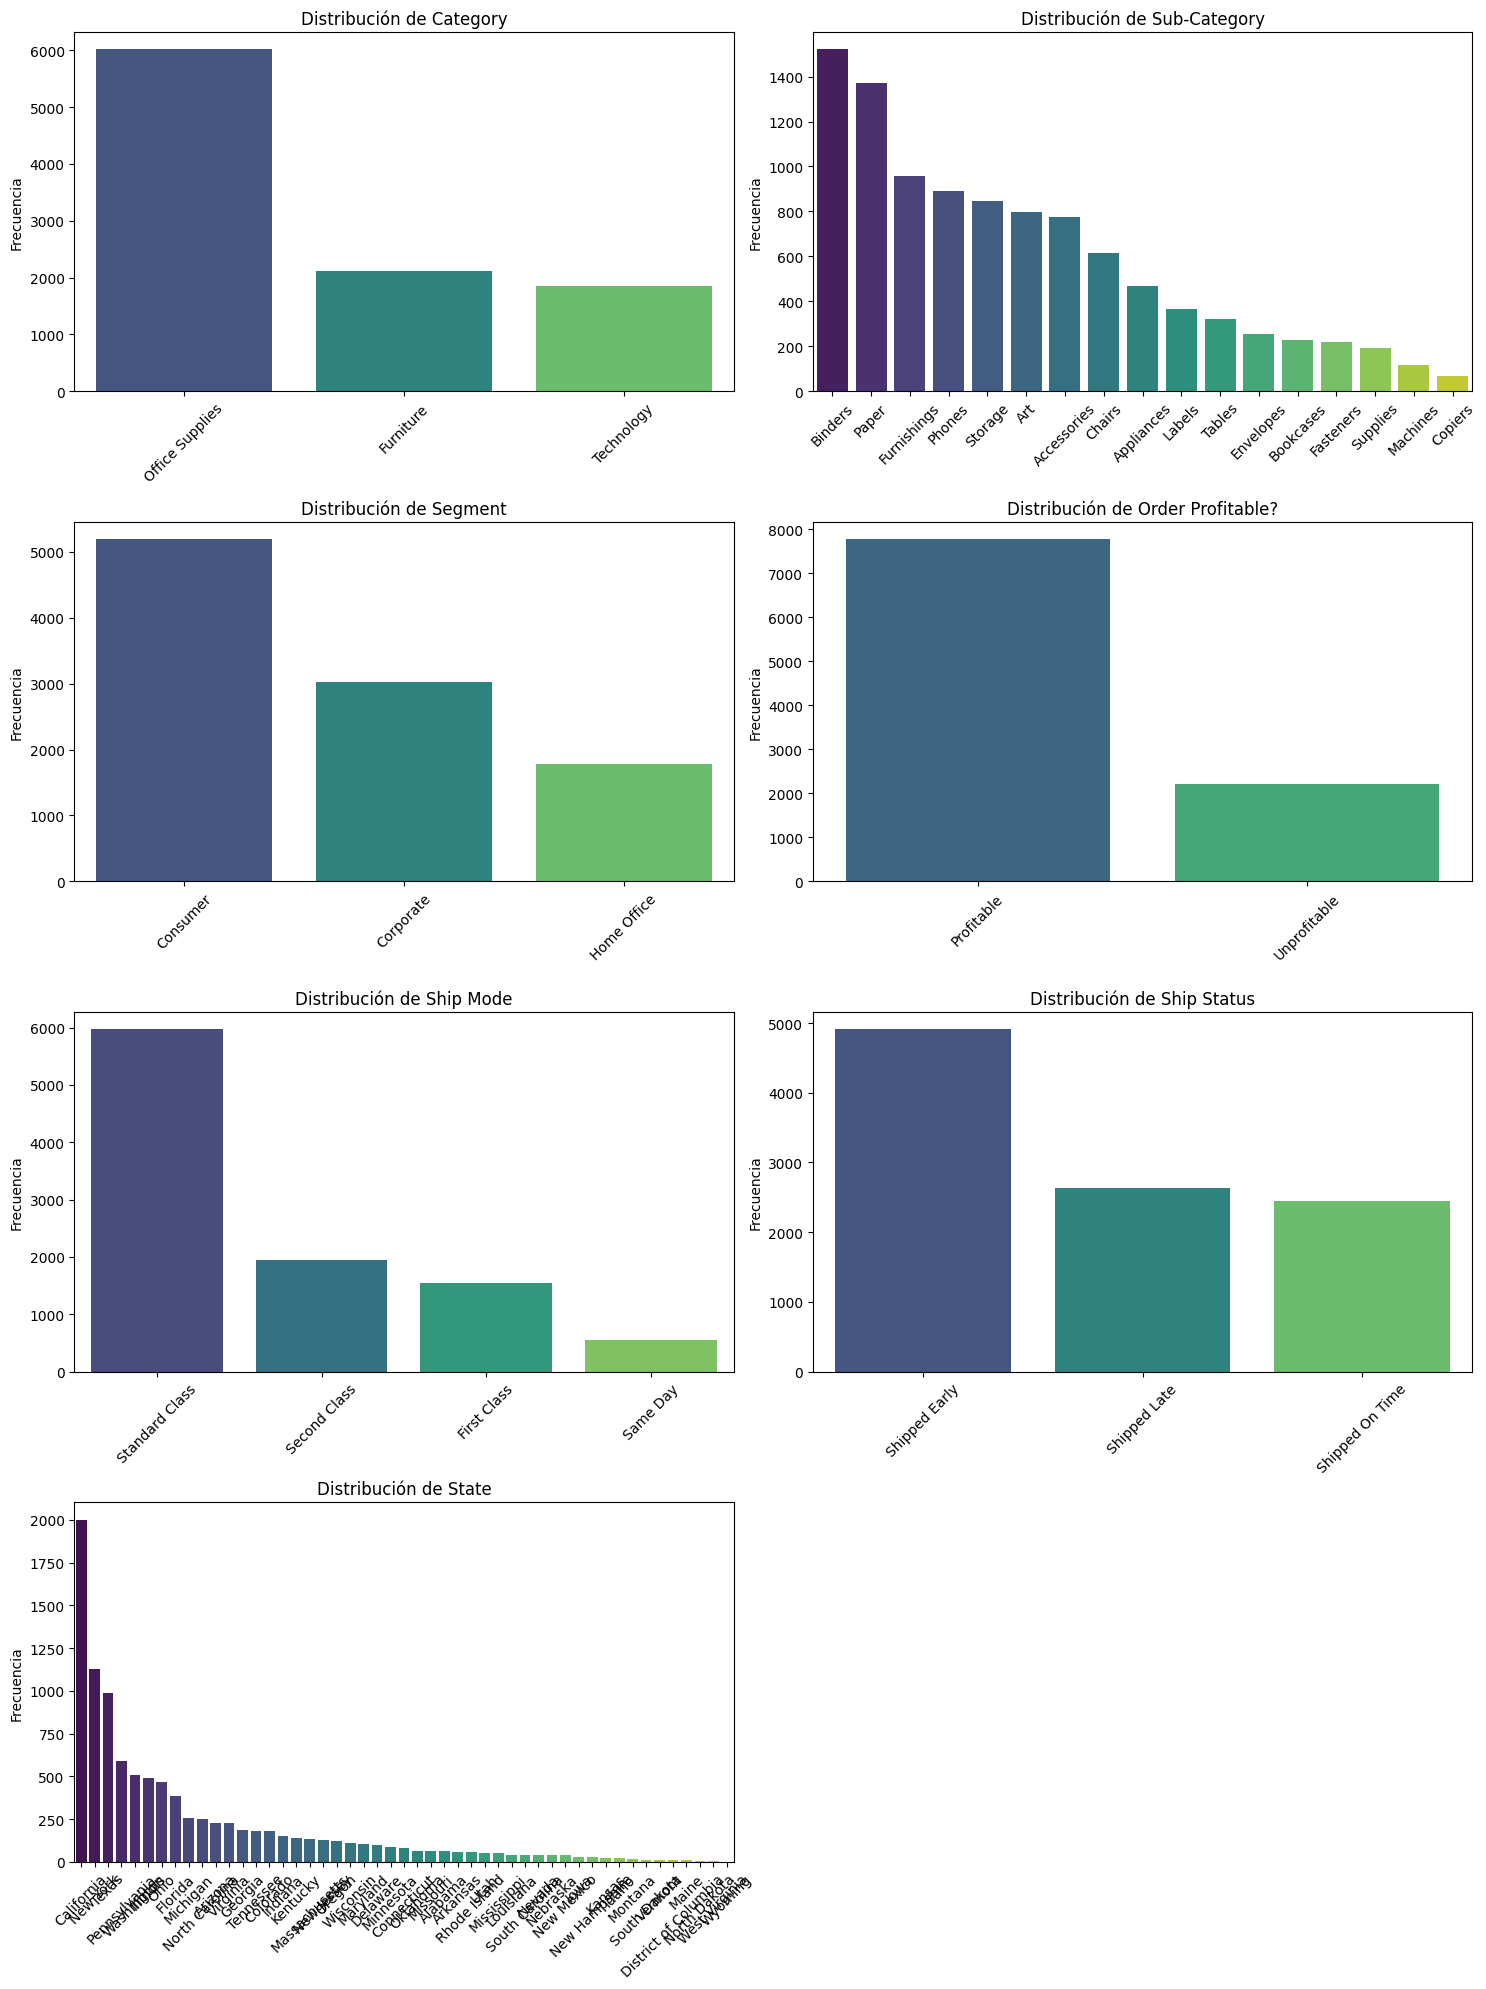

In [43]:
# Primer vistazo visual a la composición de las variables categóricas
v.pinta_distribucion_categoricas(df, critical_categorical_columns, relativa=False, mostrar_valores=False)

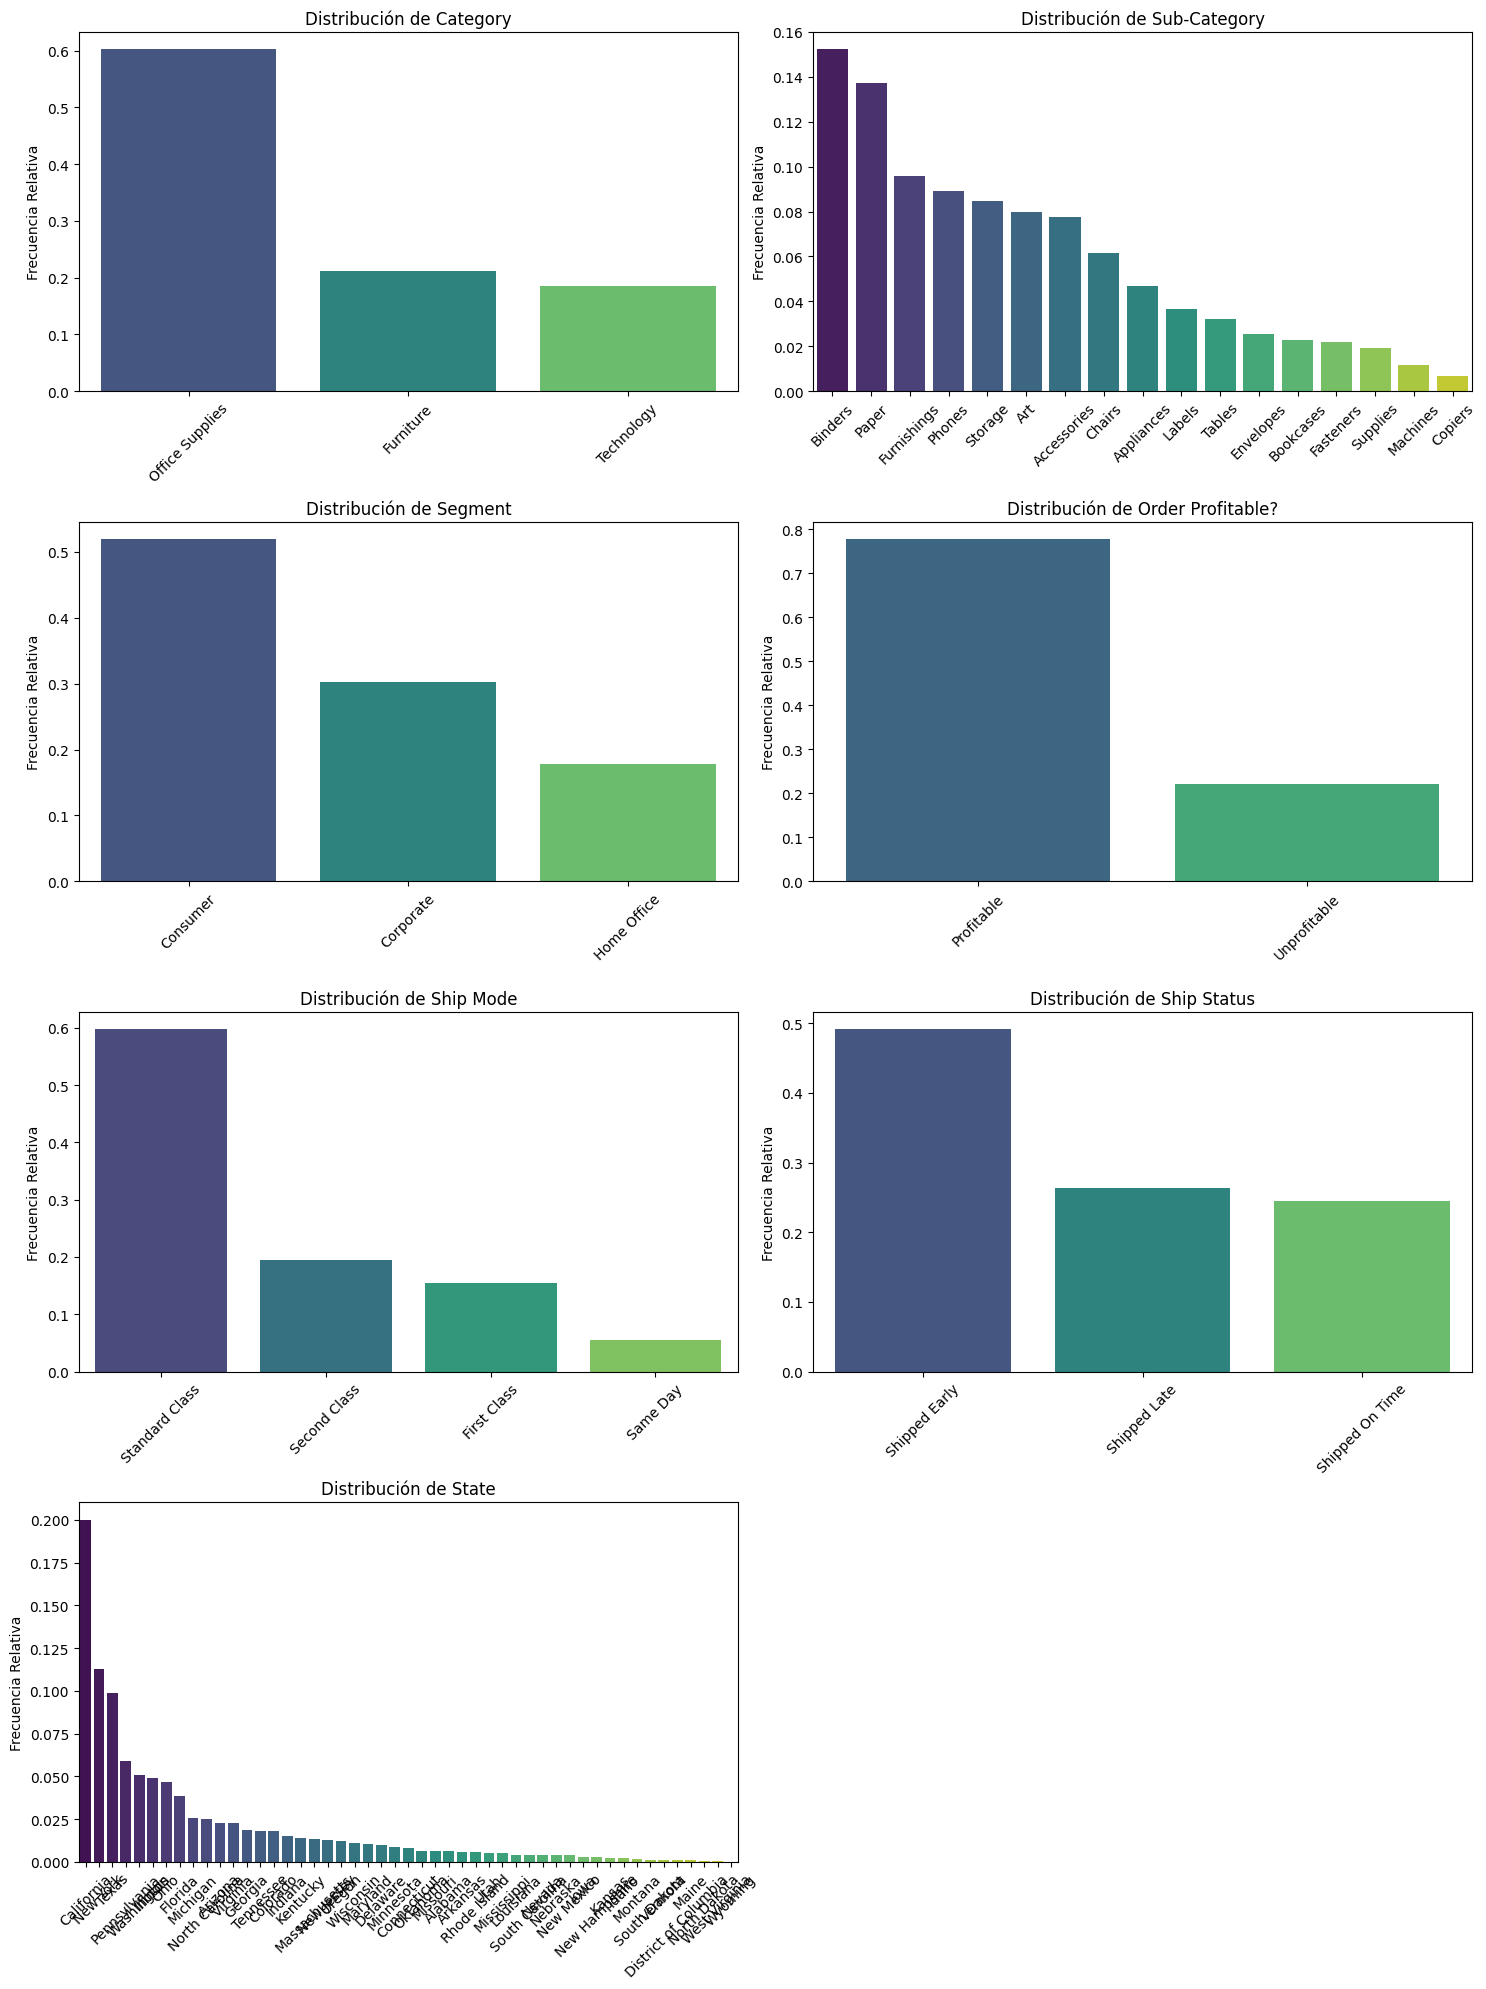

In [44]:
# Primer anaísis visual a la composición de las variables categóricas. Distribución relativa (en porcentaje) activada
v.pinta_distribucion_categoricas(df, critical_categorical_columns, relativa=True, mostrar_valores=False)

# Análisis Univariante de Variables Categóricas

## Distribución de Category
- **Perspectiva General**: La variable "Category" agrupa los productos en tres grandes categorías. Esto permite identificar las áreas clave en las que se centra el negocio.
- **Insight**: La categoría "Office Supplies" es la más frecuente, con más del doble de frecuencia que "Furniture" y "Technology" (estas dos tienen una distribución muy similar). Esto sugiere que la mayor parte de las ventas provienen de productos de suministros de oficina. Esto podría indicar una alta demanda de productos de oficina y una posible oportunidad para expandir la oferta en esta categoría. Más adelante será necesario  
entender las causas de la diferencia entre la primera y el resto de las categorías, y así identificar posibles puntos de mejora.  

## Distribución de Sub-Category
- **Perspectiva General**: "Sub-Category" desglosa las categorías principales en grupos más específicos de productos.  
- **Insight**: Las subcategorías "Binders", "Paper", y "Furnishings" dominan la distribución. Las subcategorías menos frecuentes como "Fasteners", "Machines", y "Copiers" podrían indicar nichos específicos o productos con menor demanda. Puede ser útil explorar si estas subcategorías tienen márgenes de beneficio más altos a pesar de las menores ventas.

## Distribución de Segment
- **Perspectiva General**: Mientras que "Category" clasifica  las principales líneas de productos, "Segment" muestra los diferentes categorías de clientes:  
    - Consumer: Clientes individuales que compran para uso personal.  
    - Corporate: Clientes que son empresas u organizaciones.  
    - Home Office: Clientes que compran para su oficina en casa, una categoría que puede incluir tanto a profesionales independientes como a pequeñas empresas. (*confirmar con negocio si eso es así)  
- **Insight**: El segmento "Consumer" representa la mayoría de las ventas, seguido de "Corporate" y "Home Office". Esto sugiere que la mayor parte del negocio está orientado hacia el consumidor final, lo cual podría influir en decisiones de marketing y estrategia de producto. El segmento "Home Office" podría ser un área de crecimiento, sobretodo los últimos años debido al aumento del trabajo en remoto e híbrido

## Distribución de Order Profitable?
- **Perspectiva General**: La variable "Order Profitable?" clasifica las órdenes en dos grupos: rentables y no rentables. Este es un indicador crucial para evaluar la eficiencia y la rentabilidad del negocio en general.
- **Insight**: La mayoría de las órdenes son rentables, con una menor proporción siendo no rentables, prácticmanete con un 80/20. Aunque es positivo, habrá que analizar de forma multivariable para detectar qué características tienen   
los productos que no son rentables y tratar de mejorar dicho indicador.  

## Distribución de Ship Mode
- **Perspectiva General**: "Ship Mode" describe los diferentes métodos de envío disponibles para los clientes, lo que impacta en la velocidad de entrega y en los costos de envío asociados.
- **Insight**: "Standard Class" es el método de envío más utilizado, con una mayoría abrumadora. Los métodos de envío más rápidos como "Same Day" y "First Class" son menos comunes, lo que podría indicar una menor demanda de envíos urgentes o una estrategia de costos más conservadora por parte de los clientes. Se podría explorar si la oferta de promociones o descuentos en métodos de envío más rápidos podría aumentar las ventas.

## Distribución de Ship Status
- **Perspectiva General**: La variable "Ship Status" indica el cumplimiento de los plazos de envío, categorizando los envíos como "Shipped Early", "Shipped Late", o "Shipped On Time". Es una medida directa de la eficiencia operativa y del cumplimiento de las expectativas del cliente.
- **Insight**: La mayor parte de los envíos se realizaron "Early", lo cual es positivo y puede mejorar la satisfacción del cliente. Sin embargo, una proporción considerable de envíos se realizó "Late", lo cual podría ser un área de mejora operativa. Analizar las causas de estos envíos tardíos podría ser crucial para mejorar la eficiencia y mejorar el engagement de los clientes.  

## Distribución de State
- **Perspectiva General**: "State" refleja la localización geográfica de los pedidos, lo cual es vital para identificar patrones regionales de demanda y para planificar estrategias de marketing localizadas.
- **Insight**: Los estados de California, Nueva York y Texas son los que más pedidos realizan, lo que podría reflejar la densidad de población y la actividad económica en estas áreas. Los estados con menos pedidos podrían ser oportunidades para estrategias de marketing específicas o expansiones en el futuro.  Se estudiará más adelante en ana´lsis bivariantes.  


In [45]:
df.to_csv('../data/superstore_clean.csv', index=False)

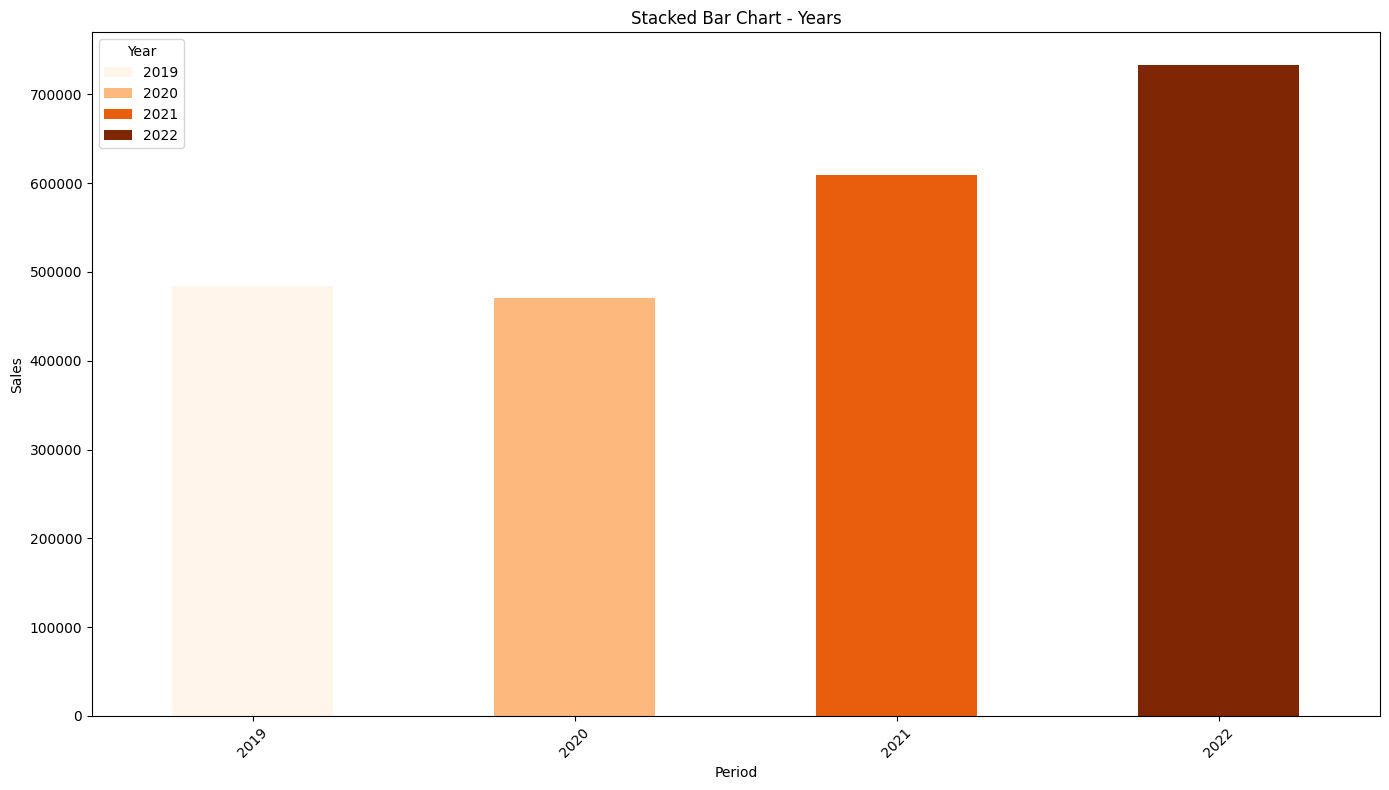

In [9]:
v.plot_stacked_bar_periodos(df, 'Order Date', 'Sales', period='years')

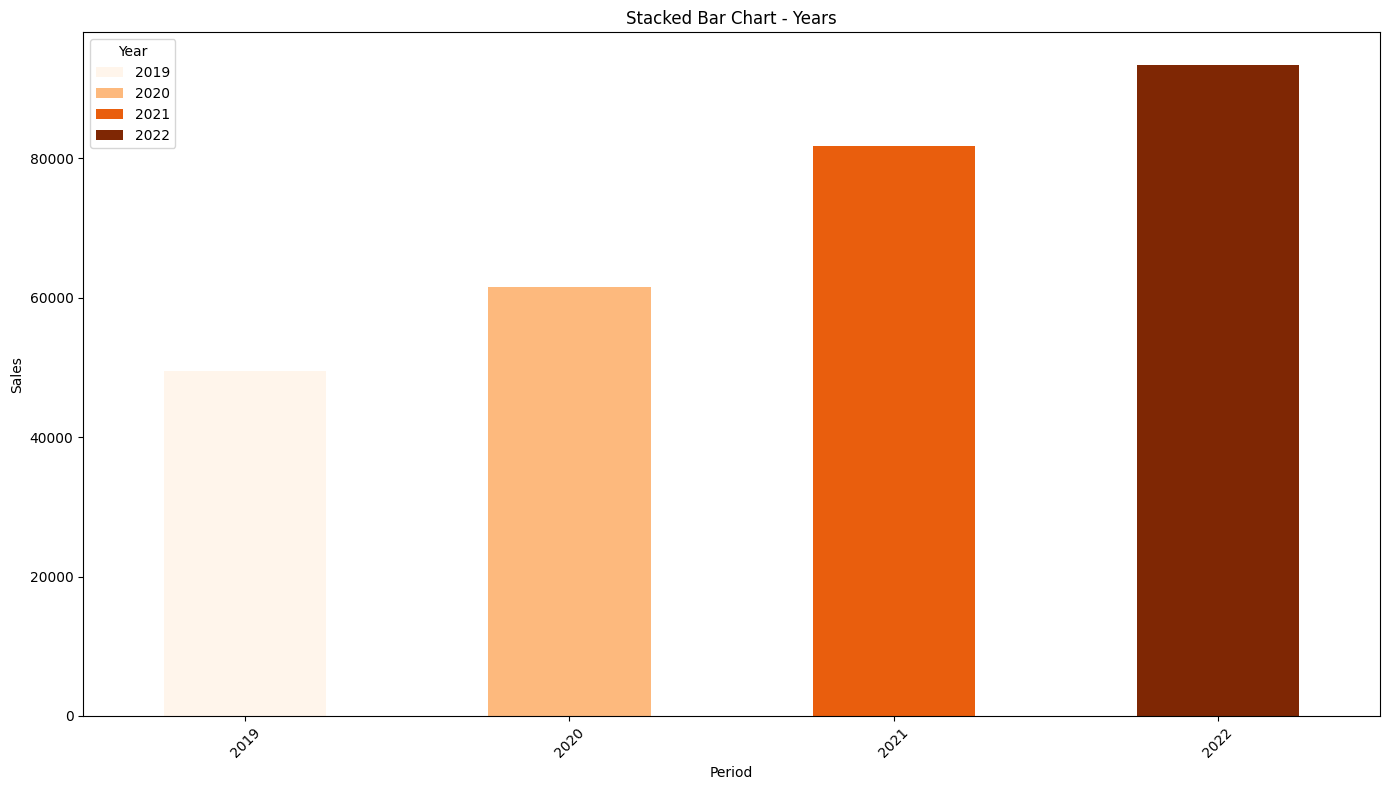

In [10]:
v.plot_stacked_bar_periodos(df, 'Order Date', 'Profit', period='years')

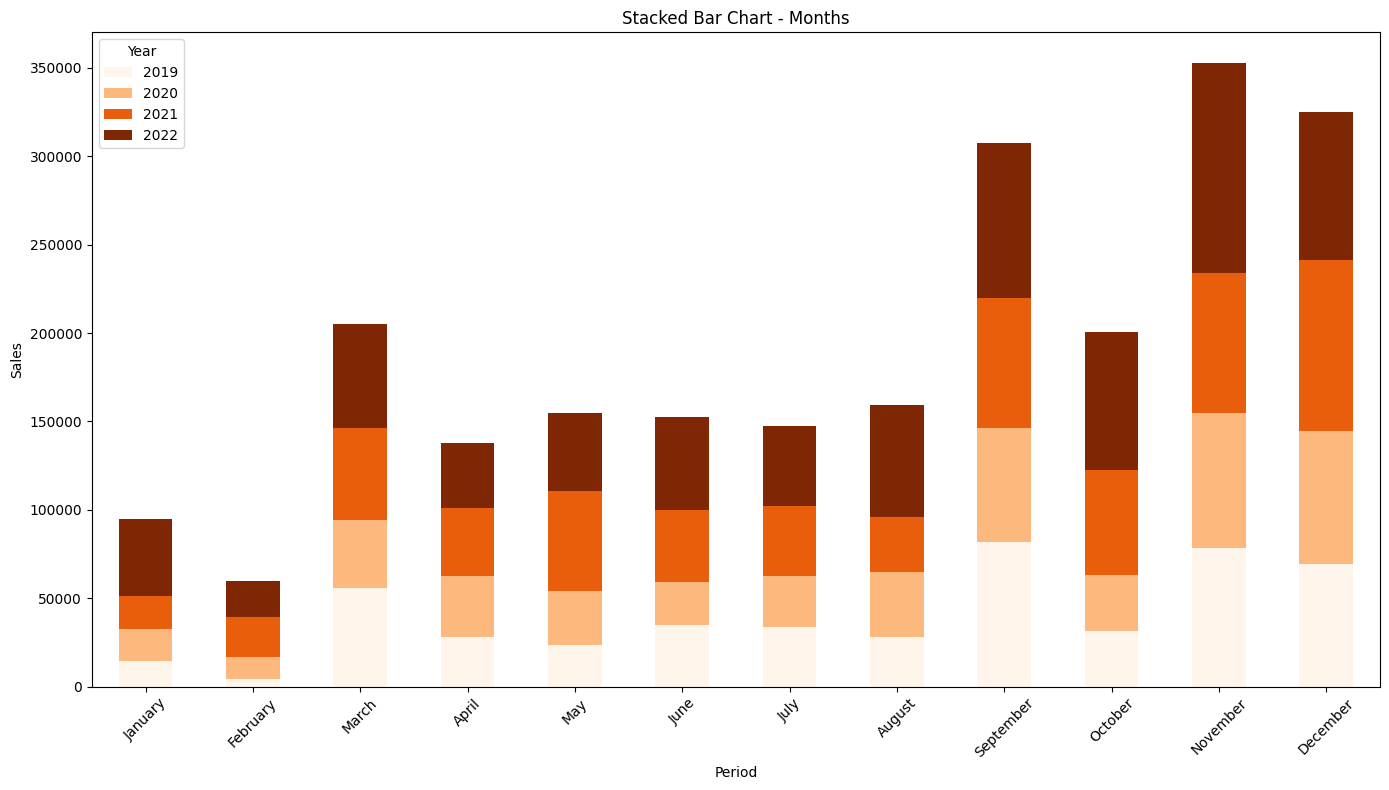

In [12]:
v.plot_stacked_bar_periodos(df, 'Order Date', 'Sales', period='months')

In [15]:
max_profit = df["Profit"].max()
max_profit

8400

In [16]:
min_profit = df["Profit"].min()
min_profit

-6600

In [12]:
df.head()

,Category,City,Country/Region,Customer Name,Order Profitable?,Product Name,Region,Segment,Ship Date,Ship Mode,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
Order Date,,,,,,,,,,,,,,,,,,,,
2021-11-08,Furniture,Henderson,United States,Claire Gute,Profitable,Bush Somerset Collection Bookcase,South,Consumer,2021-11-11,Second Class,Shipped On Time,Kentucky,Bookcases,3,3,0.00,42,2,262,392
2021-11-08,Furniture,Henderson,United States,Claire Gute,Profitable,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South,Consumer,2021-11-11,Second Class,Shipped On Time,Kentucky,Chairs,3,3,0.00,220,3,732,1096
2021-06-12,Office Supplies,Los Angeles,United States,Darrin Van Huff,Profitable,Self-Adhesive Address Labels for Typewriters b...,West,Corporate,2021-06-16,Second Class,Shipped Late,California,Labels,4,3,0.00,7,2,15,22
2020-10-11,Furniture,Fort Lauderdale,United States,Sean O'Donnell,Unprofitable,Bretford CR4500 Series Slim Rectangular Table,South,Consumer,2020-10-18,Standard Class,Shipped Late,Florida,Tables,7,6,0.45,-383,5,958,1434
2020-10-11,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,Unprofitable,Eldon Fold 'N Roll Cart System,South,Consumer,2020-10-18,Standard Class,Shipped Late,Florida,Storage,7,6,0.20,3,2,22,33


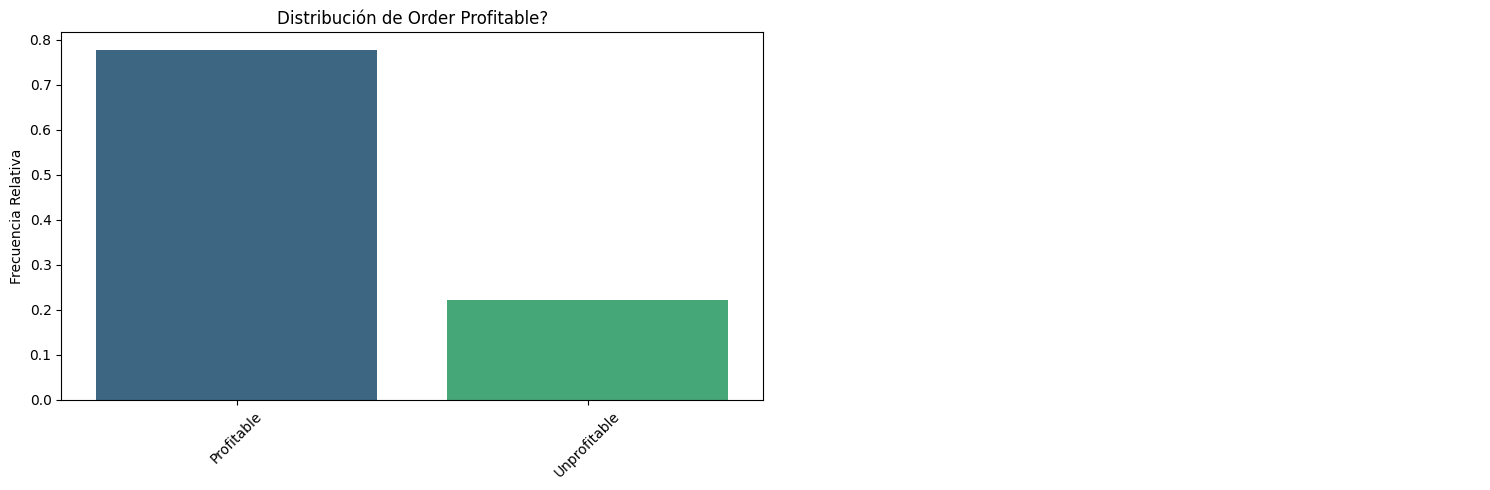

In [17]:
v.pinta_distribucion_categoricas(df, ["Order Profitable?"], relativa=True, mostrar_valores=False)

In [ ]:
max_sales = df["Profit"].max()